In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('data_set/Mall_Customers.csv')

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
subset = df.loc[:,['Age','Annual Income (k$)']]
subset

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


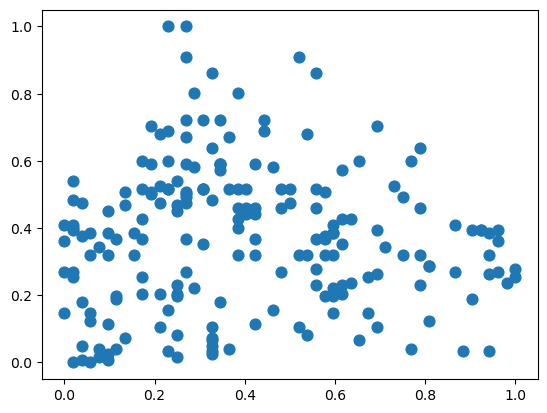

In [18]:
plt.scatter(subset['Age'],subset['Annual Income (k$)'], s= 60)

In [101]:
from sklearn.preprocessing import normalize

In [103]:

scaled_df = normalize(subset)
scaled_df = pd.DataFrame(data = scaled_df, columns = subset.columns)

In [104]:
scaled_df

,Age,Annual Income (k$)
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833
...,...,...
195,0.280000,0.960000
196,0.336336,0.941742
197,0.246154,0.969231
198,0.227454,0.973789


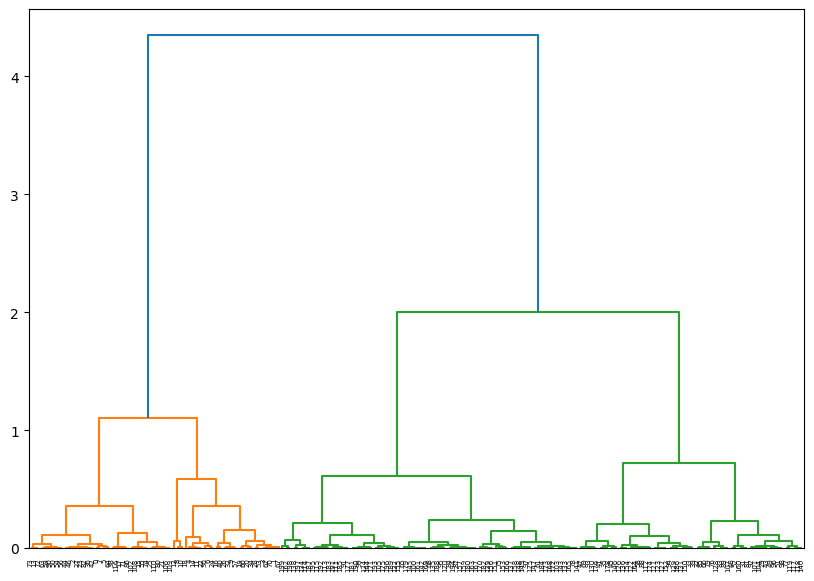

In [105]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method ='ward'))

In [106]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage = 'ward')
cluster.fit_predict(scaled_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2,
       1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [107]:
predicted_val = cluster.fit_predict(scaled_df)

In [108]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df,predicted_val)

0.6184099257331396

In [109]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors= 2)
nbrs = neigh.fit(scaled_df)
distance, indices = nbrs.kneighbors(scaled_df)

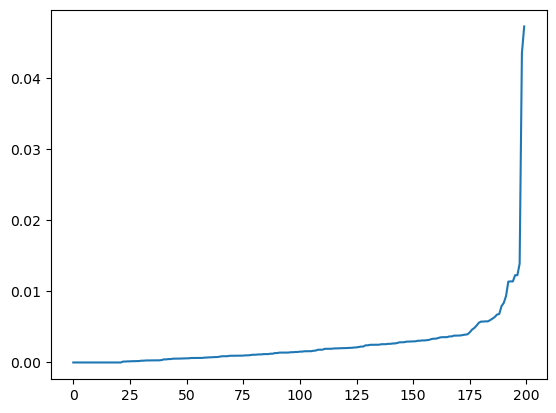

In [110]:
distance = np.sort(distance,axis = 0)
plt.plot(distance[:,1])

In [51]:
distance

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.        , 0.00819672],
       [0.

In [111]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.01, min_samples=3)
cluster.fit(scaled_df)
labels = cluster.labels_
labels


array([ 0,  1,  0,  1,  2,  0, -1,  0, -1,  3, -1,  2, -1,  4,  2,  5, -1,
        6, -1, -1,  1,  7,  2,  0, -1,  7,  3,  0,  1,  8, -1,  9,  3, 10,
        1, 10,  0, 11,  6, 10, -1, 10,  0,  8,  0, 10,  0, 12,  9,  8, 13,
        8,  9,  1, 13,  5, 13,  3, 10, 13, -1, 14,  1, 13,  0, 14, 11,  1,
       14, 12,  1,  6,  4,  4,  5, 14, -1,  8, 14, 11,  7,  9,  0, 15, 14,
       11,  6, 14, 10, 15, 13, 16,  8, 12, 10, 14,  8, 14,  8, 14, 14,  8,
        5, 14,  8, 14,  7, 15,  5,  7,  7, 16, 10, 16, 17, 16,  6,  8,  8,
        8, 14, 10, 10, 10, 14, 14, 10, 10, -1, 10, 12, 10, 14, 14, 17, 14,
       10, 14, -1, 14,  8, 14, 14, 14, 14, 14, 10, 14, 14, 14, 10, 14, 10,
       14, 10, 14, 14, 14, 14, 14,  9, 14, -1, 14, 10, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 10, 14, 12, 16, 10, 14, 14, 14, 14, 16, 14, 16, 10,
       17, 14, 14, 14, 16, 16, 14, 14, 16, 14, -1, -1, -1], dtype=int64)

In [112]:
len(set(labels))

19

In [114]:
silhouette_score(scaled_df,labels)

0.40660314319400676

In [115]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,10):
    kmeans = KMeans(n_clusters= i,init='k-means++')
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

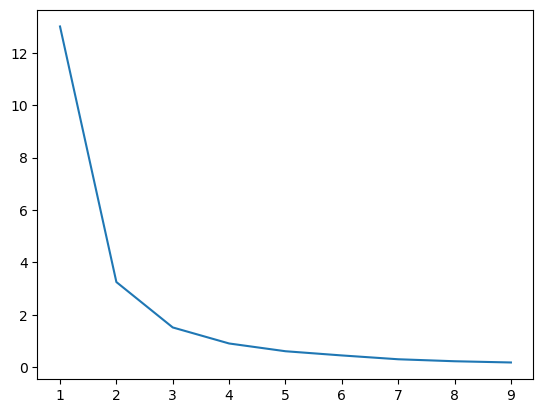

In [116]:
plt.plot(range(1,10),wcss)

In [155]:
kmeans = KMeans(n_clusters = 2,init='k-means++', random_state= 0 )
pred = kmeans.fit_predict(scaled_df)

C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [156]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [157]:
silhouette_score(scaled_df,pred)

0.8523888567051724

In [158]:
scaled_df['cluster'] = pred

In [159]:
scaled_df


,Age,Annual Income (k$),cluster
0,0.784883,0.619644,1
1,0.813733,0.581238,1
2,0.780869,0.624695,1
3,0.820905,0.571064,1
4,0.876812,0.480833,1
...,...,...,...
195,0.280000,0.960000,0
196,0.336336,0.941742,0
197,0.246154,0.969231,0
198,0.227454,0.973789,0


array([[ 3.46126032e-01,  9.36359998e-01, -2.22044605e-16],
       [ 6.87195419e-01,  7.00316825e-01,  1.00000000e+00]])

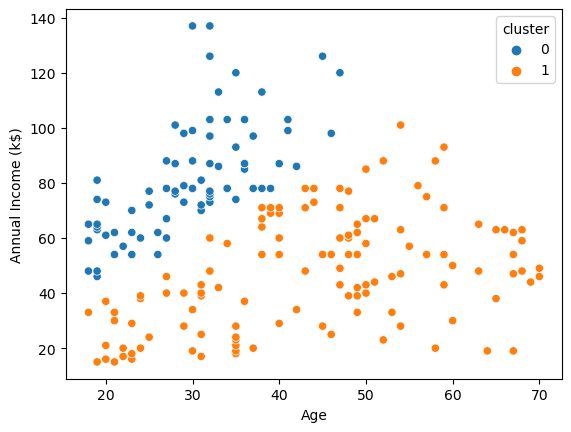

In [160]:
sns.scatterplot(data= subset, x='Age',y ='Annual Income (k$)', hue ='cluster')
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(data=centers, columns=['Feature 1', 'Feature 2','Feature 3'])
centers
